# Grouped summarization in pandas

In [1]:
# initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The .groupby() method of pandas DataFrame

Sometimes your data can be partitioned into multiple subsets, and it would be useful to obtain summary statistics on each subset. As an example, we will use the fish length and weight data taken from Alaskan shore between 1997-2006. More information about the source data can be found on [https://lod.bco-dmo.org/id/dataset/3332](https://www.bco-dmo.org/dataset/3332), and the simplified data we use can be found as the csv file [here](https://github.com/OCEAN-215-2025/preclass/tree/main/week_09/data/secm_fish_size.csv).

In [2]:
fish = pd.read_csv("data/secm_fish_size.csv", na_values=["nd"])
display(fish)

,date,time_local,haul_id,fish_id,lat,lon,locality,species,name_common,length,weight
0,1997-5-20,9:40,1001,6,58.19,-134.20,Taku_Inlet,Platichthys_stellatus,Starry_flounder,347.0,500.0
1,1997-5-20,9:40,1001,7,58.19,-134.20,Taku_Inlet,Platichthys_stellatus,Starry_flounder,341.0,430.0
2,1997-5-20,9:40,1001,8,58.19,-134.20,Taku_Inlet,Platichthys_stellatus,Starry_flounder,339.0,459.0
3,1997-5-20,9:40,1001,9,58.19,-134.20,Taku_Inlet,Platichthys_stellatus,Starry_flounder,337.0,398.0
4,1997-5-20,9:40,1001,10,58.19,-134.20,Taku_Inlet,Platichthys_stellatus,Starry_flounder,309.0,325.0
...,...,...,...,...,...,...,...,...,...,...,...
1723,2006-7-30,9:5,10085,17,58.10,-135.02,Upper_Chatham,Oncorhynchus_tshawytscha,Chinook_Imm.,472.0,1375.0
1724,2006-7-31,7:40,10088,27,58.22,-135.53,Icy_Strait,Oncorhynchus_tshawytscha,Chinook_Imm.,442.0,1400.0
1725,2006-7-31,10:30,10090,34,58.25,-135.44,Icy_Strait,Oncorhynchus_tshawytscha,Chinook_Imm.,563.0,2300.0
1726,2006-7-31,10:30,10090,35,58.25,-135.44,Icy_Strait,Oncorhynchus_tshawytscha,Chinook_Imm.,459.0,1150.0


In [3]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1728 non-null   object 
 1   time_local   1728 non-null   object 
 2   haul_id      1728 non-null   int64  
 3   fish_id      1728 non-null   int64  
 4   lat          1728 non-null   float64
 5   lon          1728 non-null   float64
 6   locality     1728 non-null   object 
 7   species      1728 non-null   object 
 8   name_common  1728 non-null   object 
 9   length       1724 non-null   float64
 10  weight       1683 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 148.6+ KB


If you inspect the dataset, you will see that many fish species show up many, many times. It may be useful to find the average length of each species of fish from this dataset. To do so, we need to **split** the dataset by species, **apply** the summarization, then **combine** the result.

Luckily, pandas has a built-in `.groupby()` method to help with this **split-apply-combine** pipeline. The `.groupby()` method will create the split and perform the combination. We just have to supply the function to apply via method chaining. In our case. the summarization function is `.mean()`, so we do:

In [4]:
fish_grp_mean = fish.loc[:, ["species", "length", "weight"]].groupby("species").mean()
display(fish_grp_mean)

,length,weight
species,,
Anarrhichthys_ocellatus,587.000000,1130.000000
Anoplopoma_fimbria,320.172043,386.913978
Brama_japonica,351.857143,1057.692308
Clupea_pallasi,208.000000,145.000000
Gadus_macrocephalus,308.700000,229.000000
Merluccius_productus,492.500000,825.000000
Oncorhynchus_gorbuscha,498.364341,1596.613546
Oncorhynchus_keta,656.794118,3531.323529
Oncorhynchus_kisutch,599.404040,3022.421053


Notice that the variable used for grouping (`species`) is now the index of the `DataFrame`. Again, we can turn the index back to a regular column via `.reset_index()`

In [5]:
fish_grp_mean = fish_grp_mean.reset_index()
fish_grp_mean

,species,length,weight
0,Anarrhichthys_ocellatus,587.000000,1130.000000
1,Anoplopoma_fimbria,320.172043,386.913978
2,Brama_japonica,351.857143,1057.692308
3,Clupea_pallasi,208.000000,145.000000
4,Gadus_macrocephalus,308.700000,229.000000
5,Merluccius_productus,492.500000,825.000000
6,Oncorhynchus_gorbuscha,498.364341,1596.613546
7,Oncorhynchus_keta,656.794118,3531.323529
8,Oncorhynchus_kisutch,599.404040,3022.421053
9,Oncorhynchus_nerka,613.909091,2913.636364


In addition to grouped mean, the following functions are available for grouped summarization:

+ `.count()`: count the number of non-NA values in each group
+ `.max()`: Compute the maximum value in each group
+ `.min()`: Compute the minimum value in each group
+ `.mean()`: Compute the mean of each group
+ `.median()`: Compute the median of each group
+ `.nunique()`: Compute the number of unique values in each group
+ `.quantile()`: Compute a given quantile of the values in each group
+ `.sem()`: Compute the standard error of the mean of the values in each group
+ `.std()`: Compute the standard deviation of the values in each group
+ `.var()`: Compute the variance of the values in each group

Recall in week 4 we talked about the concept of standard error, which is a measure of the uncertainty in the mean. To compute the standard error, we use the `.sem()` method after the `.groupby()`

In [6]:
fish_grp_sem = fish.loc[
    :, ["species", "length", "weight"]
].groupby("species").sem().reset_index()

display(fish_grp_sem)

,species,length,weight
0,Anarrhichthys_ocellatus,NaN,NaN
1,Anoplopoma_fimbria,5.672692,16.722263
2,Brama_japonica,6.237830,43.796643
3,Clupea_pallasi,NaN,NaN
4,Gadus_macrocephalus,5.166237,16.512621
5,Merluccius_productus,77.500000,225.000000
6,Oncorhynchus_gorbuscha,2.567097,35.408346
7,Oncorhynchus_keta,9.004256,152.740822
8,Oncorhynchus_kisutch,13.365375,158.806295
9,Oncorhynchus_nerka,29.958291,315.514796


Note that we have a bunch of `NaN` in the results, which is a consequence that some species only appeared once in the dataset.

To combine the two `DataFrames`, we can use `pd.concat()` with `axis=1`. But because some variable names are repeated, we first have to modify those names:

In [7]:
fish_grp_mean.columns = ["species", "mean_length", "mean_weight"]
fish_grp_sem.columns = ["species", "stderr_length", "stderr_weight"]

In [8]:
fish_grp_stats = pd.concat([
    fish_grp_mean.set_index("species"), 
    fish_grp_sem.set_index("species")
], axis = 1).reset_index()

display(fish_grp_stats)

,species,mean_length,mean_weight,stderr_length,stderr_weight
0,Anarrhichthys_ocellatus,587.000000,1130.000000,NaN,NaN
1,Anoplopoma_fimbria,320.172043,386.913978,5.672692,16.722263
2,Brama_japonica,351.857143,1057.692308,6.237830,43.796643
3,Clupea_pallasi,208.000000,145.000000,NaN,NaN
4,Gadus_macrocephalus,308.700000,229.000000,5.166237,16.512621
5,Merluccius_productus,492.500000,825.000000,77.500000,225.000000
6,Oncorhynchus_gorbuscha,498.364341,1596.613546,2.567097,35.408346
7,Oncorhynchus_keta,656.794118,3531.323529,9.004256,152.740822
8,Oncorhynchus_kisutch,599.404040,3022.421053,13.365375,158.806295
9,Oncorhynchus_nerka,613.909091,2913.636364,29.958291,315.514796


## Example: climatology

As a second example, suppose we are interested in climatology, i.e., the long term weather pattern. Our source data are weather information at the SeaTac airport and Spokane airport, from 2020 to 2024. The data is sourced from [NOAA Climate Data Online](https://www.ncei.noaa.gov/cdo-web/), and a copy of the simplified and combined data we use can be found [here](https://github.com/OCEAN-215-2025/preclass/tree/main/week_09/data/WA_weather_2000-2024.csv).

In [9]:
WA_weather = pd.read_csv("data/WA_weather_2000-2024.csv", parse_dates = ["DATE"])
display(WA_weather)

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,2000-01-01,6.9,4.4,6.1,2.8
1,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,2000-01-02,0.0,-3.9,7.2,2.8
2,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,2000-01-03,7.1,5.6,8.3,2.2
3,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,2000-01-04,7.6,7.8,10.0,5.6
4,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,112.5,2000-01-05,0.0,5.0,6.7,2.8
...,...,...,...,...,...,...,...,...,...
18259,"SPOKANE INTERNATIONAL AIRPORT, WA US",47.62168,-117.52796,717.7,2024-12-27,0.8,2.7,4.4,0.6
18260,"SPOKANE INTERNATIONAL AIRPORT, WA US",47.62168,-117.52796,717.7,2024-12-28,4.3,4.4,7.2,3.3
18261,"SPOKANE INTERNATIONAL AIRPORT, WA US",47.62168,-117.52796,717.7,2024-12-29,15.2,3.7,3.9,0.6
18262,"SPOKANE INTERNATIONAL AIRPORT, WA US",47.62168,-117.52796,717.7,2024-12-30,8.9,1.1,2.8,-1.6


In [10]:
WA_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18264 entries, 0 to 18263
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   NAME       18264 non-null  object        
 1   LATITUDE   18264 non-null  float64       
 2   LONGITUDE  18264 non-null  float64       
 3   ELEVATION  18264 non-null  float64       
 4   DATE       18264 non-null  datetime64[ns]
 5   PRCP       18259 non-null  float64       
 6   TAVG       12654 non-null  float64       
 7   TMAX       18264 non-null  float64       
 8   TMIN       18263 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.3+ MB


To proceed, we extract the day of year from the timestamp, which we'll use as our group-by variable:

In [11]:
WA_weather["day_of_year"] = WA_weather["DATE"].dt.dayofyear

Now we can perform the group-by and compute the mean and standard error. Note that since we have two locations that we want to analyze separately, we need to group by both `NAME` and `day_of_year`:

In [12]:
WA_weather_mean = WA_weather.groupby(
    ["NAME", "day_of_year"]
).mean(numeric_only=True).reset_index()

WA_weather_sem = WA_weather.groupby(
    ["NAME", "day_of_year"]
).sem(numeric_only=True).reset_index()

In [13]:
WA_weather_mean

,NAME,day_of_year,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,"SEATTLE TACOMA AIRPORT, WA US",1,47.44467,-122.31442,112.5,4.688000,4.276471,7.736000,1.844000
1,"SEATTLE TACOMA AIRPORT, WA US",2,47.44467,-122.31442,112.5,7.264000,4.029412,7.820000,1.928000
2,"SEATTLE TACOMA AIRPORT, WA US",3,47.44467,-122.31442,112.5,4.600000,4.988235,8.104000,2.112000
3,"SEATTLE TACOMA AIRPORT, WA US",4,47.44467,-122.31442,112.5,5.864000,5.229412,7.980000,2.720000
4,"SEATTLE TACOMA AIRPORT, WA US",5,47.44467,-122.31442,112.5,5.540000,5.147059,8.076000,3.072000
...,...,...,...,...,...,...,...,...,...
727,"SPOKANE INTERNATIONAL AIRPORT, WA US",362,47.62168,-117.52796,717.7,2.372000,-2.082353,0.684000,-3.824000
728,"SPOKANE INTERNATIONAL AIRPORT, WA US",363,47.62168,-117.52796,717.7,2.172000,-2.535294,0.744000,-4.868000
729,"SPOKANE INTERNATIONAL AIRPORT, WA US",364,47.62168,-117.52796,717.7,2.672000,-2.600000,-0.364000,-5.756000
730,"SPOKANE INTERNATIONAL AIRPORT, WA US",365,47.62168,-117.52796,717.7,2.464000,-2.952941,-0.756000,-6.404000


In [14]:
WA_weather_mean = WA_weather_mean.loc[
    :, ["NAME", "day_of_year", "PRCP", "TAVG", "TMAX", "TMIN"]
]

WA_weather_sem = WA_weather_sem.loc[
    :, ["NAME", "day_of_year", "PRCP", "TAVG", "TMAX", "TMIN"]
]

WA_weather_mean.columns = [
    "NAME", "day_of_year", "PRCP_mean", "TAVG_mean", "TMAX_mean", "TMIN_mean"
]

WA_weather_sem.columns = [
    "NAME", "day_of_year", "PRCP_sem", "TAVG_sem", "TMAX_sem", "TMIN_sem"
]

In [15]:
WA_weather_stat = pd.concat([
    WA_weather_mean.set_index(["NAME", "day_of_year"]),
    WA_weather_sem.set_index(["NAME", "day_of_year"])
], axis = 1).reset_index()    

In [16]:
display(WA_weather_stat)

,NAME,day_of_year,PRCP_mean,TAVG_mean,TMAX_mean,TMIN_mean,PRCP_sem,TAVG_sem,TMAX_sem,TMIN_sem
0,"SEATTLE TACOMA AIRPORT, WA US",1,4.688000,4.276471,7.736000,1.844000,1.379690,0.843423,0.635082,0.761732
1,"SEATTLE TACOMA AIRPORT, WA US",2,7.264000,4.029412,7.820000,1.928000,2.506318,0.945335,0.659722,0.685845
2,"SEATTLE TACOMA AIRPORT, WA US",3,4.600000,4.988235,8.104000,2.112000,1.353255,0.837006,0.721376,0.732719
3,"SEATTLE TACOMA AIRPORT, WA US",4,5.864000,5.229412,7.980000,2.720000,1.405938,1.042895,0.787274,0.800854
4,"SEATTLE TACOMA AIRPORT, WA US",5,5.540000,5.147059,8.076000,3.072000,1.581086,1.052522,0.750628,0.855015
...,...,...,...,...,...,...,...,...,...,...
727,"SPOKANE INTERNATIONAL AIRPORT, WA US",362,2.372000,-2.082353,0.684000,-3.824000,0.652394,0.866460,0.768346,0.818235
728,"SPOKANE INTERNATIONAL AIRPORT, WA US",363,2.172000,-2.535294,0.744000,-4.868000,0.935566,0.942460,0.770348,0.887087
729,"SPOKANE INTERNATIONAL AIRPORT, WA US",364,2.672000,-2.600000,-0.364000,-5.756000,0.914577,1.119381,0.786318,0.953748
730,"SPOKANE INTERNATIONAL AIRPORT, WA US",365,2.464000,-2.952941,-0.756000,-6.404000,0.981884,0.988579,0.826803,1.228257


Now we can visualize the climatology of average temperature with a plot:

In [17]:
spokane_stat = WA_weather_stat.loc[WA_weather_stat["NAME"] == "SPOKANE INTERNATIONAL AIRPORT, WA US"]
seatac_stat = WA_weather_stat.loc[WA_weather_stat["NAME"] == "SEATTLE TACOMA AIRPORT, WA US"]

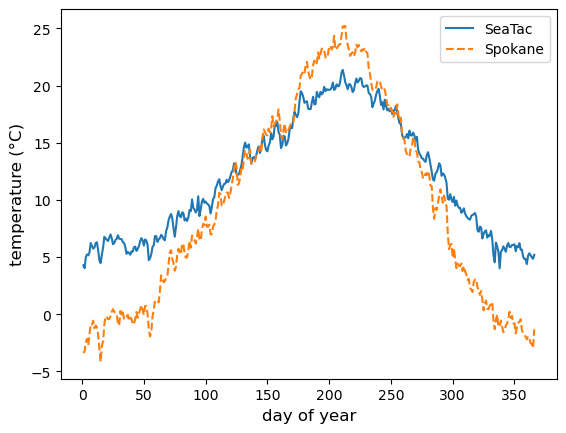

In [18]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(seatac_stat["day_of_year"], seatac_stat["TAVG_mean"], ls = "-", label="SeaTac")
ax.plot(spokane_stat["day_of_year"], spokane_stat["TAVG_mean"], ls = "--", label="Spokane")

ax.set_xlabel("day of year", fontsize=12)
ax.set_ylabel("temperature (°C)", fontsize=12)

ax.legend()

plt.show(fig)